#### KNN Model

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("customer_knn.csv")

#### Data Exploration

In [3]:
df

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1
...,...,...,...,...,...
195,CUSTID196,120000,36,79,1
196,CUSTID197,126000,46,32,1
197,CUSTID198,126000,29,72,0
198,CUSTID199,137000,32,22,0


In [4]:
df.shape

(200, 5)

In [5]:
df.head(10)

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1
5,CUSTID6,17000,25,81,1
6,CUSTID7,18000,34,8,1
7,CUSTID8,18000,26,98,1
8,CUSTID9,19000,66,1,0
9,CUSTID10,19000,33,70,1


In [6]:
# To view entire columns
pd.set_option("display.max_columns",None)
df.head()

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1


In [7]:
df.describe()

,Yearly_Income,Age,Cust_Spend_Score,Sex
count,200.000000,200.000000,200.000000,200.000000
mean,60560.000000,39.095000,51.380000,0.560000
std,26264.721165,14.088592,26.034488,0.497633
min,15000.000000,17.000000,1.000000,0.000000
25%,41500.000000,28.000000,33.750000,0.000000
50%,61500.000000,36.000000,51.000000,1.000000
75%,78000.000000,49.250000,72.000000,1.000000
max,137000.000000,73.000000,103.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Cust_Number       200 non-null    object
 1   Yearly_Income     200 non-null    int64 
 2   Age               200 non-null    int64 
 3   Cust_Spend_Score  200 non-null    int64 
 4   Sex               200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.dtypes


Cust_Number         object
Yearly_Income        int64
Age                  int64
Cust_Spend_Score     int64
Sex                  int64
dtype: object

In [10]:
df.isnull().sum()

Cust_Number         0
Yearly_Income       0
Age                 0
Cust_Spend_Score    0
Sex                 0
dtype: int64

In [11]:
df.duplicated().value_counts()

False    200
dtype: int64

In [12]:
df.columns

Index(['Cust_Number', 'Yearly_Income', 'Age', 'Cust_Spend_Score', 'Sex'], dtype='object')

#### Target Variable

In [ ]:
plt.figure(figsize=(5,2))
plt.rc("font",size=10)
sns.countplot(y="Sex",data=df);

The Target Variable is mostly balanced so we can build the model

##### Ordinal encoding

In [ ]:
catcols=df.select_dtypes(include='object').columns
for i in catcols:
    print(i)

In [15]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[['Cust_Number']]=oe.fit_transform(df[['Cust_Number']])

In [16]:
df.dtypes

Cust_Number         float64
Yearly_Income         int64
Age                   int64
Cust_Spend_Score      int64
Sex                   int64
dtype: object

In [17]:
df.head()

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,0.0,15000,18,44,0
1,111.0,15000,18,79,0
2,123.0,16000,23,8,1
3,134.0,16000,25,79,1
4,145.0,17000,32,41,1


##### HeatMap

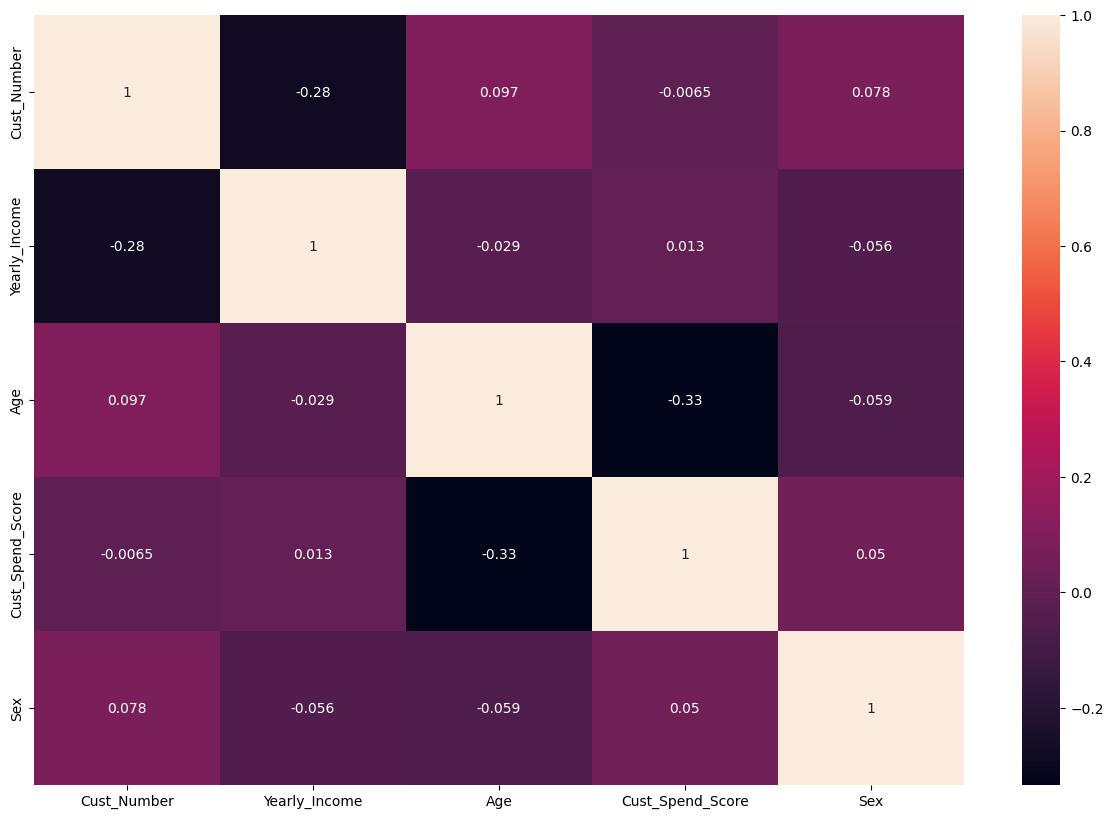

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True);

In [19]:
X=df.drop(['Sex'],axis=1)
y=df["Sex"]

#### Splitting the data

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [21]:
from sklearn.metrics import classification_report ,confusion_matrix ,accuracy_score

##### Model building KNN

##### Model 

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
score=knn.score(X_test,y_test)
print(f'Model accuracy on test ={score*100:.2f}%')

Model accuracy on test =62.00%


In [24]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
score=knn.score(X_test,y_test)
print(f'Model accuracy on test ={score*100:.2f}%')

Model accuracy on test =42.00%


In [25]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
score=knn.score(X_test,y_test)
print(f'Model accuracy on test ={score*100:.2f}%')

Model accuracy on test =50.00%


In [26]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
score=knn.score(X_test,y_test)
print(f'Model accuracy on test ={score*100:.2f}%')

Model accuracy on test =44.00%


#### Model Evaluation

In [30]:
y_pred=knn.predict(X_test)
print(f"Classification report:\n\n {classification_report(y_test,y_pred)}")


Classification report:

               precision    recall  f1-score   support

           0       0.41      0.44      0.42        16
           1       0.73      0.71      0.72        34

    accuracy                           0.62        50
   macro avg       0.57      0.57      0.57        50
weighted avg       0.63      0.62      0.62        50



In [31]:
knn_matrix = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix:\n\n{knn_matrix}")

Confusion Matrix:

[[ 7  9]
 [10 24]]


In [32]:
print(f"Accuracy Score:\n\n{accuracy_score(y_test,y_pred)*100:.2f}%")

Accuracy Score:

62.00%
